#Introduction à PyTorch :

Ce TP donne une initiation auframework de Machine/Deep Learning PyTorch en utilisant leserviceGoogle Colab. Ce TP a pour objectifs : 
- Comprendre la bibliothèque Tensor PyTorch et les réseaux de neurones.
- Construire et entrainer un réseaux de neurones pour la classification des images.

##PyTorch :

*PyTorch* est une bibliothèque de Machine/Deep Learning qui lie la ré-utilisabilité et la performance des outils de  Machine/Deep Learning :
- PyTorch fournit un style de programmation imp ́eratif et ”Pythonic” qui prend en charge lecode en tant que modèle. 
- PyTorch facilite le d ́ebogage et est compatible avec d’autres bibliothèques informatiques scientifiques populaire. 
- PyTorch prend en charge les accélérateurs matériels tels que comme GPU.  


Nous allons aborder quelques aspect lies aux Deep Learning en utilisant PyTorch.  
Nous finironspar un exemple d’utilisation de ces mod`eles pour la classification d’images sur plusieurs platformes matèriels.

##Google Colab :
Google Colaboratory plus communément appele  *Google  Colab* ou tout simplement *Colab* est un projet de recherche pour le prototypage de modèles de Machine Learning sur des plates-formes matérielles puissantes telles que les GPU et les TPU. *Google Colab* fournit un environnement de notebook *Jupyter* sur serveur pour le développement interactif. Google Colab est gratuit à utiliser comme les autres produits du *G Suite*.

##Préparation de l'environnement de développement :
**NOTE** : comme Google Colaboratory est un service cloud de Google, il faut s'assurer d'avoir uncompte Gmail afin de pouvoir l'utiliser.  

- **Première connexion** : en utilisant un navigateur web, connectez-vous https://colab.research.google.com/en utilisant votre  compte  Gmail. Vous allez être redirige vers une page introduisant Google  Colab. Commencez à prendre en main quelques concepts basiques du developpement sous Colab : exécuter les cellules codes existantes, en rajouter  d'autres, ajouter des cellules Markdown, etc.  
- **Création d'un Notebook** : cliquez sur ***Fichier→Nouveau notebook***. Changez le nom du notebook en double-cliquant sur **Untitled** en haut à gauche de la page en le remplaçant par un nom du format suivant : **TP\[formation\]\[matière\]\[NOM\]\[PRENOM\]**. Ce notebook vous suivra tout au long du TP. Le notebook devra être rendu à la fin des TP.  
- **Importation d'un Notebook** : cliquez sur ***Fichier→Ouvrir*** un notebook.  Localisez le notebook que vous trouverez avec l'ennoncé et faites ouvrir aprés l'avoir renommer suivant lacharte pr ́ec ́edente. C'est plus simple de travailler sur le carnet donné en TP que de le recréer à zero.  
- **Création et exécution des cellules** : il existe principalement deux types  de cellules :
1. `+ Code` pour code Python ou commande notebook/shell
2. `+ Texte` pour code Markdown ou HTML  
Pour exécuter une cellule, il faut cliquer sur le boutton 'Play' à gauche de la cellule, utliser le raccourci ***Shift+Entrée***, ou cluquer sur `Exécution` puis `Exécuter le code selectionné`.
- **Environnement d'exécution CPU/GPU/TPU** : google colab offre principalement trois plateformes d'exécution : 1) CPU (noté `None`), 2) GPU, et 3) TPU. 
Pour passer d'une platforme à une  autre, cliquez sur `Exécution`, `Modifier le type d'exécution`, le menu déroulant du `Accelerateur matériel` puis choisir la plateforme.

#Introduction au Deep Learning avec PyTorch
Cette introduction suppose la maitrise de la bibliothèque `numpy`.
##Installation PyTorch
Nous devrons d'abord installer la bibliothèque PyTorch. Vous pouvez le faire en utilisant la commande suivante :

In [0]:
!pip3 install torch torchvision

###Tensors :
Un `Tensor` est une unité de stockage de données communément utilisée dans le domaine du Deep Learning. Comme `ndarray` dans `numpy`, un `Tensor` c'est généralement un tableau de `n` dimensions, adapté à une exécution sur GPU.  
Nous allons explorer quelques aspects sur les `Tensors`, en commençant par importer le package `torch` qui représente PyTorch.  

In [0]:
from __future__ import print_function
import torch

Nou pouvons d'abord déclarer une matrice sans initialisation de ses valeurs.  
Nous déclarons une matrice sur PyTorch comme suit :

In [0]:
x = torch.empty(5, 3)
print(x)

Lorsqu'une matrice non initialisée est créée, les valeurs qui étaient dans la mémoire allouée à ce moment-là apparaîtront comme valeurs initiales. Nous pouvons déclarer une matrice, aléatoirement initialisée avec des valeurs réelles comprises entre 0 et 1 : 

In [0]:
x = torch.rand(5, 3)
print(x)

Pour créer une matrice aléatoirement initialisée avec des entiers générer entre 1 et 10 : 

In [0]:
x =  torch.randint(1, 10, (5, 3))
print(x)

Déclarer une matrice remplie de zéros et de `dtype` (i.e. data type) long qui est un entier sur 64 bits :

In [0]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

Nou pouvons s'assurer du type de la variable `x` en utilisant la fonction `type()` :

In [0]:
type(x)

Nous pouvons créer un `Tensor` directement à partir des valeurs prédéfinies :

In [0]:
x = torch.tensor([[0,1,2], [3,4,5], [6,7,8], [-6,-7,-8], [-3,-4,-5]])
print(x)

On peut créer un `tensor` basé sur un autre `tensor` existant. Ces méthodes réutilisent les propriétés du `tensor` d'entrée :

In [0]:
x = x.new_zeros(5,3, dtype=torch.double)
print(x)

Voir https://pytorch.org/docs/stable/torch.html#torch.randint_like pour regénerer un `tensor` initialisé avec des valeurs aléatoires en se basant sur un `tensor` existant :

In [0]:
x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)

### Opérations sur les `Tensor`
Les opérations sur les `tensor` peuvent être directement appliquée sur ces dérniers comme suit : 

In [0]:
y = torch.rand(5, 3)
print(x + y)

Ou bien utiliser des fonctions prédéfinies de PyTorch :

In [0]:
print(torch.add(x,y))

Le résultat pourrait être récupéré en passant un `tensor` (noté `z`) comme argument :

In [0]:
z = torch.empty(5,3)
torch.add(x,y,out=z)
print(z)

Un opération sur un `tensor` pourrait être faite `in-place` (généralement suivi par `_`), c'est à dire que le résultat est stocké dans le `tensor` appelant de la fonction et repmlacera donc l'anciène valeur : 

In [0]:
y.add_(x)
print(y)

Nous pouvons utiliser la notation de `numpy` pour manipuler les `tensor` sur PyTorch. Afficher la première colonne comme suit : 

In [0]:
print(y[:, 0])

Il y a donc un lien entre les `tensor` PyTorch et les `NumPy Array`.  
Les modules `Torch Tensor` et `NumPy` partageront le même éspace mémoire (si le Torch Tensor est sur CPU), et changer l'un changera l'autre.  
On peut convertir un `tensor` PyTorch en un `array` Numpy commme suit :

In [0]:
a = torch.rand(5)
print("a : ", a)
b = a.numpy()
print("b : ", b)

Si l'on change la valeur du `tensor` PyTorch, la valeur du `array` Numpy change également:

In [0]:
a.add_(1)
print("a : ", a)
print("b : ", b)

On peut faire la conversion dans le sens inverse :

In [0]:
import numpy as np
# Générer un tableau aléatoirement initilisé
a = np.random.rand(5)
# Convertir le tableau en un tensor PyTorch
b = torch.from_numpy(a)

np.add(a, 1, out=a)
print("a : ", a)
print("b : ", b)

Jusqu'à présent, tous les `tensor` créés sont traité sue CPU.  
`PyTorch` offre la possibilité de transférer les `tensor` sur GPU (c'est d'ailleurs la différence entre `Numpy` et `PyTorch`).  
Les `tensor` peuvent donc être transférés entre CPU <-> GPU en utilisant la méthode `.to()`. 

###Les Tensors CUDA 
Il faut d'abord changer le type de l'accélérateur matériel en GPU afin de pour utiliser les `CUDA tensor`.

In [0]:
device = "cpu"
if torch.cuda.is_available():
  device = torch.device("cuda")
print(device)

cuda


On peut créer le `tensor` directement sur GPU en le passant en paramètre :

In [0]:
%%time
x = torch.rand(5, device=device)
y = torch.ones(5, device=device)
x.add_(y)
print(x)

On peut créer le `tensor` sur CPU puis le transférer sur GPU :

Pour déconnexion:




In [0]:
from __future__ import print_function
import torch
import numpy as np
from datetime import datetime, timedelta

***Excercise*** : 
- Coder des functions de calcul des opérations élémentaires sur des matrices sur CPU et sur GPU en utilisant `torch` (e.g. `matrix_add_CPU(a, b), matrix_add_GPU(a,b)`. 
- Mesurer les temps d'exécutions des fonctions codées puis comparer les en utilisant un histogramme `pyplot`.
- Que remarquiez-vous?

# Addition:

In [0]:
a = torch.rand(1000000, device="cpu")
b = torch.ones(1000000, device="cpu")
c = torch.empty(1000000, device="cpu")

start_time_CPU = datetime.now()
c = torch.add(a,b)
end_time_CPU = datetime.now()
#print("Sur CPU : ",c)

a = a.to(device)
b = b.to(device)

start_time_GPU = datetime.now()
c = torch.add(a,b).to(device)
end_time_GPU = datetime.now()
#print("Sur GPU : ", c)

Add_CPU = end_time_CPU - start_time_CPU
Add_GPU = end_time_GPU - start_time_GPU
print("CPU :", Add_CPU,"secondes")
print("GPU :", Add_GPU,"secondes")

CPU : 0:00:00.001509 secondes
GPU : 0:00:00.000212 secondes


# Multiplication:

In [0]:

a = torch.rand(1000000, device="cpu")
d = torch.empty(1000000, device="cpu")

start_time_CPU = datetime.now()
d = torch.mul(a,3)
end_time_CPU = datetime.now()
print("Multiplication d'une matrice par un entier sur CPU : ",d)

a = a.to(device)

start_time_GPU = datetime.now()
d = torch.mul(a,3).to(device)
end_time_GPU = datetime.now()
print("Multiplication d'une matrice par un entier sur GPU : ", d)


Mult_CPU = end_time_CPU - start_time_CPU
Mult_GPU = end_time_GPU - start_time_GPU
print("temps CPU :", Mult_CPU)
print("temps GPU :", Mult_GPU)

Multiplication d'une matrice par un entier sur CPU :  tensor([0.2191, 2.4430, 2.5224,  ..., 2.8394, 2.8226, 2.7222])
Multiplication d'une matrice par un entier sur GPU :  tensor([0.2191, 2.4430, 2.5224,  ..., 2.8394, 2.8226, 2.7222], device='cuda:0')
temps CPU : 0:00:00.001595
temps GPU : 0:00:00.000355


Mult GPU

# Produit de matrice:

In [0]:

a = torch.rand(1000000, device="cpu")
b = torch.ones(1000000, device="cpu")
e = torch.empty(1000000, device="cpu")

start_time_CPU = datetime.now()
e = torch.dot(a, b)
end_time_CPU = datetime.now()
print("Produit matriciel de deux matrices sur CPU : ",e)

a = a.to(device)
b = b.to(device)

start_time_GPU = datetime.now()
e = torch.dot(a, b).to(device)
end_time_GPU = datetime.now()
print("Produit matriciel de deux matrices sur GPU : ", e)


Dot_CPU = end_time_CPU - start_time_CPU
Dot_GPU = end_time_GPU - start_time_GPU
print("temps CPU :", Dot_CPU)
print("temps GPU :", Dot_GPU)

Produit matriciel de deux matrices sur CPU :  tensor(500135.1250)
Produit matriciel de deux matrices sur GPU :  tensor(500135.0625, device='cuda:0')
temps CPU : 0:00:00.000870
temps GPU : 0:00:00.000238


Convertire datetime en float pour pouvoir les reutiliser directement dans le graphique:

In [0]:
Add_CPU = Add_CPU.total_seconds()
Add_GPU = Add_GPU.total_seconds()

Mult_CPU = Mult_CPU.total_seconds()
Mult_GPU = Mult_GPU.total_seconds()

Dot_CPU = Dot_CPU.total_seconds()
Dot_GPU = Dot_GPU.total_seconds()

# Graphique temps obtenu

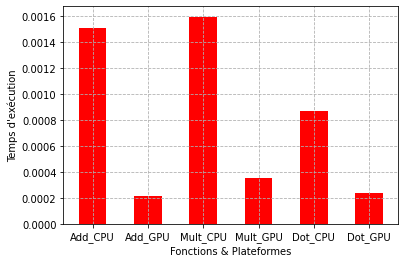

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
width = 0.5
mesures = {"Add_CPU":Add_CPU, "Add_GPU":Add_GPU, "Mult_CPU": Mult_CPU, "Mult_GPU": Mult_GPU, "Dot_CPU": Dot_CPU, "Dot_GPU": Dot_GPU}
plt.bar(mesures.keys(), mesures.values(), width, color='r')
plt.xlabel("Fonctions & Plateformes")
plt.ylabel("Temps d'exécution")
plt.grid(b=True, which='major', axis='both', linestyle='--')
plt.show()

- Après plusieurs test on peut vite remarquer que les temps d'executions sur CPU et GPU sont sensiblements les mêmes lorsque les tailles des matrices sont faibles, mais arrivé à une taille importante des matrices sur lesquels on exécute les opérations, on remarque l'énorme différence de temps de calcul (comme on peut le voir sur le graphique). 

###La convolution :
La cnvolution est la base des réseau neuronal convolutif. 
Comme le montre la figure ci-dessous, la convolution (à deux dimensions dans nôtre cas) consiste à appliquer un filtre 2D (également appelé noyau) sur une matrice d'une taille plus grande, en appliquant une multiplication élément à élément, suivie d'une somme des résultats de multiplication. 
En plus de la matrice en entrée et du filtre, la convolution prend également un pas (*stride* en anglais) et une marge (*padding* en anglais). Le pas contrôle le mouvement du filtre sur la matrice en entrée tandis que la marge spécifie le nombre de lignes/colonnes contenant des zéros à ajouter à la frontière de la matrice en entrée. Dans l'exemple ci-dessous, le pas et la marge sont fixés à 1.
![](https://i.stack.imgur.com/9OZKF.gif)

***Exercice*** : 
1. Proposez deux implémentations d'une convolution 2D tel que:
  - `my_2D_Conv_CPU(matrix, kernel, stride, padding)` une convolution 2D sur CPU
  - `my_2D_Conv_CPU(matrix, kernel, stride, padding)` une convolution 2D sur GPU
avec `matrix` la matrice en entrée, `kernel` qui est le filtre, le pas `stride`, et la marge `padding`.  
Afin de tester votre implémentation, ajuster les valeurs du `stride` et du `padding` afin de garder les mêmes dimensions de la matrice en entrée après l'application de la convolution.
2. Proposez une implémentation d'une fonction de visualisation d'une matrice sous forme d'image. Pour ceci, vous pouvez utiliser la fonction `imshow()` de `pyplot`.
3. Toujours en s'assurant que les dimensions de l'image en sortie restent les mêmes après la convolution, suivez l'exemple ci-dessous en testant votre implémentation sur l'image donnée dans l'exemple avec les filtres suivants :  
$$a = \begin{bmatrix} 1 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 1 \end{bmatrix}$$  
$$b = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}$$  
$$c = \begin{bmatrix} 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 0 \end{bmatrix}$$
4. Affichez les images avant et aprés la comnvolution. Que remarquiez-vous?
5. Refaites le même traitement avec les fltres $a$, $b$, et $c$ en changeant leur taille comme suit : 5x5, 7x7, et en ajustant les veleurs du `du stride` et du `padding`.
6. Comparez les temps d'exécution des deux implémentations de la convolution, CPU vs GPU sous forme d'histogramme. 


# **Exercice:** 

# 1. Implémentation de convolution 2D:

In [3]:
from __future__ import print_function
import torch
import numpy as np
import math
from datetime import datetime, timedelta

device = "cpu"
if torch.cuda.is_available():
  device = torch.device("cuda")
print(device)

cuda


Fonctions annexes

In [0]:
#construction de l'image de la matrice en fonction du padding
def image_matrix(matrix, row, column, padding):
  row_image = row + (2*padding)
  column_image = column + (2*padding)
  image = torch.zeros((row_image, column_image))
  image[padding: -padding, padding: -padding] = matrix
  return (image) 

#calcul la valeur pour une case de la matrice de sortie
def cal_val(mult, row_kernel, column_kernel):
  val = 0
  for i in range (0, row_kernel):
    for j in range (0, column_kernel):
      val += mult[i, j]
  return (val)

#calcul dimension matrice de sortie
def val_indice_output(stride, row, column):
  if (row%stride)==0:
    new_row = row/stride
  else:
    new_row = math.ceil(row/stride)
  if (column%stride)==0:
    new_clm = column/stride
  else:
    new_clm = math.ceil(column/stride)
  return (int(new_row), int(new_clm))

Fonction de convolution:

In [0]:
def my_2D_Conv_CPU(matrix, kernel, stride, padding):
  #Variables
  row = int(matrix.size()[0])
  column = int(matrix.size()[1])
  row_kernel = int(kernel.size()[0])
  column_kernel = int(kernel.size()[1])

  #Init image
  image = image_matrix(matrix, row, column, padding)
  row_image = int(image.size()[0])
  column_image = int(image.size()[1])
  #print("Matrice image :\n", image,"\n")

  temp = torch.zeros(row_kernel, column_kernel)
  cptJ = 0
  cptI = 0

  if(column_kernel<column_image):
    nbIterationColumn = 1
  else:
    nbIterationColumn = 0
    
  if(row_kernel<row_image):
    nbIterationRow = 1
  else:
    nbIterationRow = 0

  for i in range(column_kernel, column_image, stride):
    nbIterationColumn += 1
  for i in range(row_kernel, row_image, stride):
    nbIterationRow += 1

  #Init output matrix
  row_Output,column_Output = val_indice_output(stride, nbIterationRow, nbIterationColumn)
  outputMatrix = torch.zeros(row_Output, column_Output)

  for i in range (0, nbIterationRow, stride):
    for j in range (0, nbIterationColumn, stride):
      temp = image[(i*stride):(row_kernel+(i*stride)), (j*stride):(column_kernel+(j*stride))]

      mult = torch.mul(temp, kernel)
      value = cal_val(mult, row_kernel, column_kernel)

      outputMatrix[cptI, cptJ] = value
      cptJ += 1 

    cptJ = 0
    cptI += 1

  #print("Matrice de sortie :\n", outputMatrix,"\n")
  return outputMatrix

Test de la fonction


In [7]:
#Test énoncé
stride = 1
padding = 1
kernel = torch.tensor([[0,-1,0],[-1,5,-1],[0,-1,0]])
matrix = torch.tensor([[105, 102, 100, 97, 96], [103, 99, 103, 101, 102], [101, 98, 104, 102, 100],[95, 105, 99, 100, 101],[103, 96, 98, 99, 102]])
#kernel = torch.tensor([[0,-1,0,1,0],[-1,5,1,-2,-1], [0,-1,-2,3,0],[1,1,2,-3,0],[0,-2,1,-3,2]])

#matrix = torch.randint(95, 105, (15, 15))
#print("Matrice d'entrée :\n", matrix,"\n")


device = "cpu"
#Convolution 2D CPU
start_time_CPU = datetime.now()
my_2D_Conv_CPU(matrix, kernel, stride, padding).to(device)
end_time_CPU = datetime.now()

CPU_times = end_time_CPU - start_time_CPU
print("CPU times: ", CPU_times, "\n")

#Convolution 2D GPU
if torch.cuda.is_available():
  device = torch.device("cuda")

  start_time_GPU = datetime.now()
  my_2D_Conv_CPU(matrix, kernel, stride, padding).to(device)
  end_time_GPU = datetime.now()

  GPU_times = end_time_GPU - start_time_GPU
  print("GPU times: ",GPU_times,"\n")
else:
  print("GPU unavailable")

CPU times:  0:00:00.005262 

GPU times:  0:00:00.002923 



# 2.Fonction de visualisation d'une matrice sous forme d'image

  Librairies nécessaires et création des différents filtres:

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt 
from PIL import Image
from torchvision import transforms

matrice = torch.tensor([[105, 102, 100, 97, 96], [103, 99, 103, 101, 102], [101, 98, 104, 102, 100],[95, 105, 99, 100, 101],[103, 96, 98, 99, 102]], dtype=torch.short)

#filtre 3*3
a = torch.tensor([[1,0,1],[0,1,0],[1,0,1]], dtype=torch.short)
b = torch.eye(3, dtype=torch.short)
c = torch.tensor([[0,0,1],[0,1,0],[1,0,0]])
#filtre 5*5
a5 = torch.tensor([[1,0,0,0,1],[0,1,0,1,0],[0,0,1,0,0],[0,1,0,1,0],[1,0,0,0,1]], dtype=torch.short)
b5 = torch.eye(5, dtype=torch.short)
c5 = torch.tensor([[0,0,0,0,1],[0,0,0,1,0],[0,0,1,0,0],[0,1,0,0,0],[1,0,0,0,0]], dtype=torch.short)
#filtre 7*7
a7 =  torch.tensor([[1,0,0,0,0,0,1],[0,1,0,0,0,1,0],[0,0,1,0,1,0,0],[0,0,0,1,0,0,0],[0,0,1,0,1,0,0],[0,1,0,0,0,1,0],[1,0,0,0,0,0,1]], dtype=torch.short)
b7 = torch.eye(7, dtype=torch.short)
c7 = torch.tensor([[0,0,0,0,0,0,1],[0,0,0,0,0,1,0],[0,0,0,0,1,0,0],[0,0,0,1,0,0,0],[0,0,1,0,0,0,0],[0,1,0,0,0,0,0],[1,0,0,0,0,0,0]])

Fonction visualisation sous forme d'image d'une matrice:

In [0]:
def matrix_to_im(matrix):
  if (matrix.numel() != 0):
    result = transforms.ToPILImage()(matrice)
    plt.imshow(result)
  else: 
    print("La matrice passé en paramètre est vide: ")

def convolution_and_to_im(matrix, kernel, stride, padding):
  newMatrix = my_2D_Conv_CPU(matrix, kernel, stride, padding)

  if (newMatrix.numel() != 0):
    result = transforms.ToPILImage()(newMatrix)
    plt.imshow(result)
  else: 
    print("Veuillez choisir une autre configuration pour le stride et le padding, car dans cette configuration la matrice en sortie est vide")

#  3. et 4.
**Image avant convolution:**

Matrice de base : 
 tensor([[105, 102, 100,  97,  96],
        [103,  99, 103, 101, 102],
        [101,  98, 104, 102, 100],
        [ 95, 105,  99, 100, 101],
        [103,  96,  98,  99, 102]], dtype=torch.int16) 



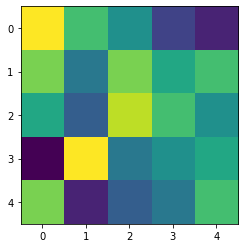

In [78]:
print("Matrice de base : \n", matrice, "\n")
matrix_to_im(matrice)

  - Image de la matrice après convolution avec le filtre a 3x3

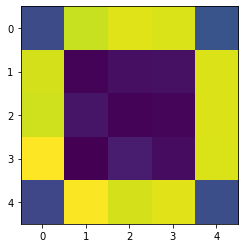

In [96]:
stride = 1
padding = 1
convolution_and_to_im(matrice, a, stride, padding)

 - Image de la matrice après convolution avec le filtre b 3x3

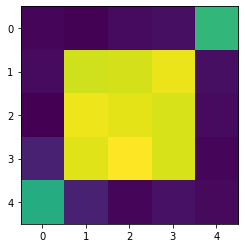

In [82]:
stride = 1
padding = 1
convolution_and_to_im(matrice, b, stride, padding)

  - Image de la matrice après convolution avec le filtre c 3x3

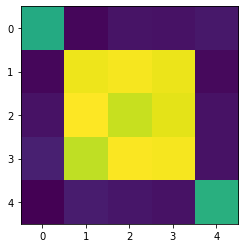

In [91]:
stride = 1
padding = 1
convolution_and_to_im(matrice, c, stride, padding)

**Remarque:**
  On peut observer que les filtres jouent un rôle primordial dans le résultat obtenue après convolution. En effet, sachant que chaque couleur correspond à une valeur différente, on constate que l'image générer conserve le même "paterne" que le filtre utilisé. 

# 5.
**Avec les filtres de taille 5x5 (en changeant le padding à 2 afin de garder les mêmes dimensions en ce qui concerne la matrice de sortie):**

- Filtre a

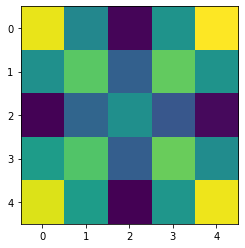

In [84]:
stride = 1
padding = 2
convolution_and_to_im(matrice, a5, stride, padding)

- Filtre b

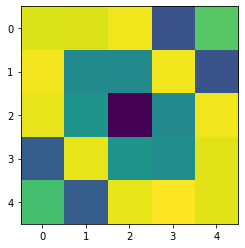

In [85]:
stride = 1
padding = 2
convolution_and_to_im(matrice, b5, stride, padding)

- Filtre c

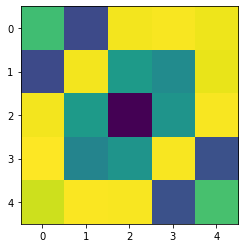

In [86]:
stride = 1
padding = 2
convolution_and_to_im(matrice, c5, stride, padding)

**Avec les filtres de taille 7x7 (padding = 3):**


- Filtre a 7x7

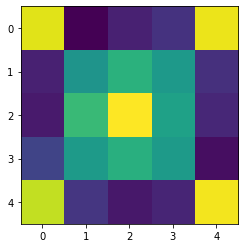

In [87]:
stride = 1
padding = 3
convolution_and_to_im(matrice, a7, stride, padding)

- Filtre b 7x7

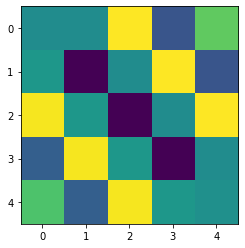

In [88]:
stride = 1
padding = 3
convolution_and_to_im(matrice, b7, stride, padding)

- Filtre c 7x7

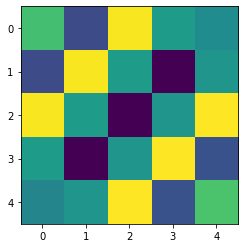

In [89]:
stride = 1
padding = 3
convolution_and_to_im(matrice, c7, stride, padding)

# 6. Comparaison des temps de traitement

  Reprise du code en haut pour la comparaison des temps et la construction de l'histogramme:

In [105]:
device = "cpu"
#Convolution 2D CPU
start_time_CPU = datetime.now()
my_2D_Conv_CPU(matrix, kernel, stride, padding).to(device)
end_time_CPU = datetime.now()

convolution_CPU = end_time_CPU - start_time_CPU
print("CPU times: ", convolution_CPU, "\n")

#Convolution 2D GPU
if torch.cuda.is_available():
  device = torch.device("cuda")

  start_time_GPU = datetime.now()
  my_2D_Conv_CPU(matrix, kernel, stride, padding).to(device)
  end_time_GPU = datetime.now()

  convolution_GPU = end_time_GPU - start_time_GPU
  print("GPU times: ",convolution_GPU,"\n")
else:
  print("GPU unavailable")

CPU times:  0:00:00.005197 

GPU times:  0:00:00.003108 



Génération de l'histogramme:

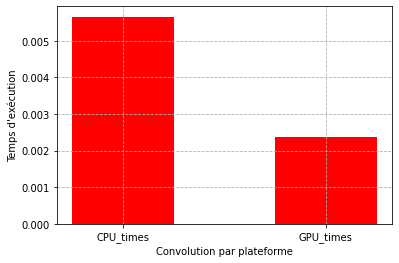

In [103]:
%matplotlib inline
import matplotlib.pyplot as plt
width = 0.5

convolution_CPU = convolution_CPU.total_seconds()
convolution_GPU = convolution_GPU.total_seconds()

mesures = {"CPU_times":convolution_CPU, "GPU_times":convolution_GPU}
plt.bar(mesures.keys(), mesures.values(), width, color='r')
plt.xlabel("Convolution par plateforme")
plt.ylabel("Temps d'exécution")
plt.grid(b=True, which='major', axis='both', linestyle='--')
plt.show()

Encore une fois comme pour les opérations élémentaires, les différences entre les temps de calculs CPU/GPU ne sont pas significatives si les traitements demandés ne sont pas importants mais dès que les matrices et les calculs deviennent importants on constate une très net différence et un gain de temps considérable avec les GPU.